### Importación de datos



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda,tienda2,tienda3,tienda4]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación

Sumar cantidad de ventas por tienda y hacer grafica

In [2]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [6]:
ingresos_totales = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}
ingresos_redondeados = {tienda: round(valor, 2) for tienda, valor in ingresos_totales.items()}

print(ingresos_redondeados)
     


{'Tienda 1': np.float64(1150880400.0), 'Tienda 2': np.float64(1116343500.0), 'Tienda 3': np.float64(1098019600.0), 'Tienda 4': np.float64(1038375700.0)}


In [5]:
# Sumando solo el precio de las ventas, sin considerar las cuotas
facturacion_tienda1 = tienda['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

# Mostrar los resultados
print(f"Facturación Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:.2f}")

# Facturación total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:.2f}")

Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


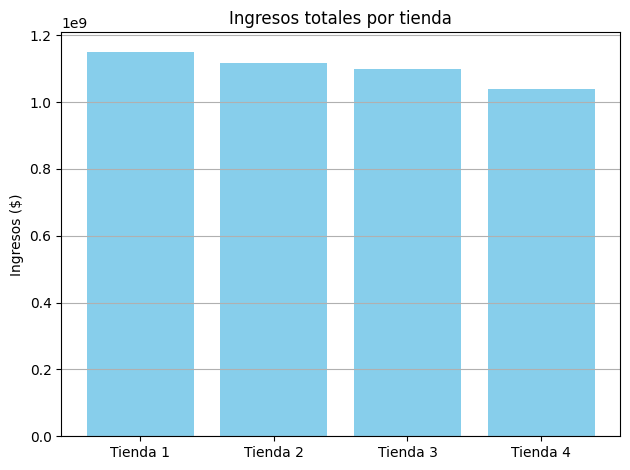

In [9]:
plt.bar(ingresos_totales.keys(), ingresos_totales.values(), color='skyblue')
plt.title('Ingresos totales por tienda')
plt.ylabel('Ingresos ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Mostrar las categorias que se repiten mas y las que se repiten menos por tienda

In [10]:
ventas_por_categoria = {
    'Tienda 1': tienda['Categoría del Producto'].value_counts(),
    'Tienda 2': tienda2['Categoría del Producto'].value_counts(),
    'Tienda 3': tienda3['Categoría del Producto'].value_counts(),
    'Tienda 4': tienda4['Categoría del Producto'].value_counts()
}

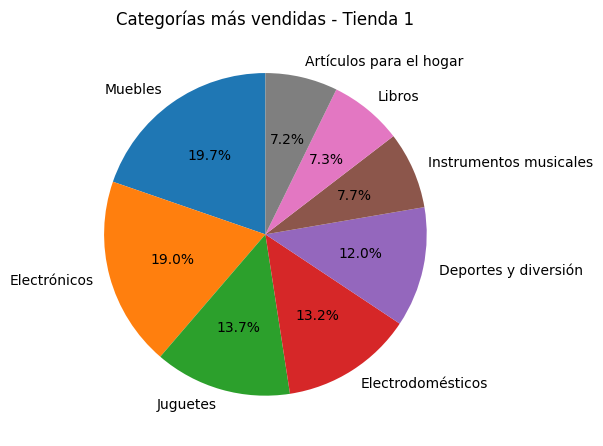

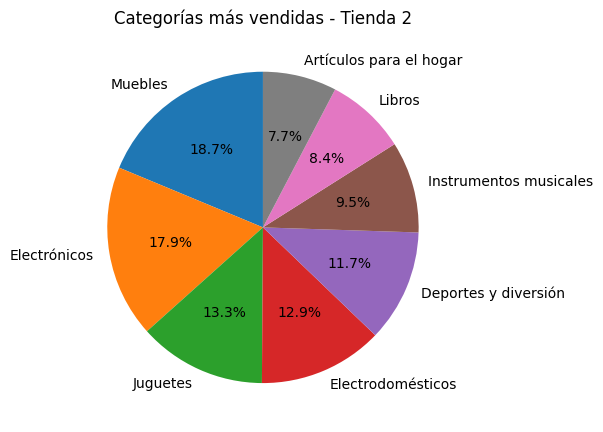

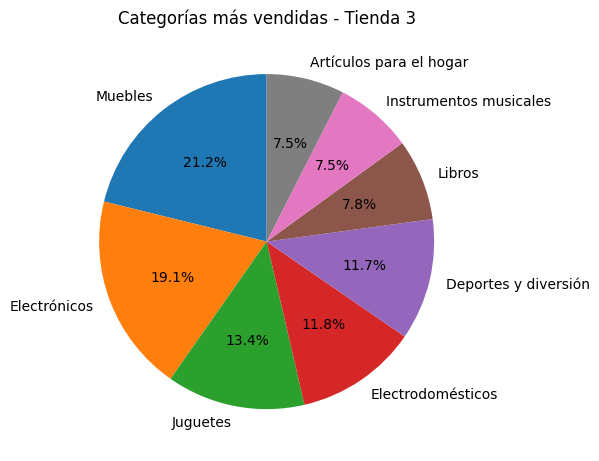

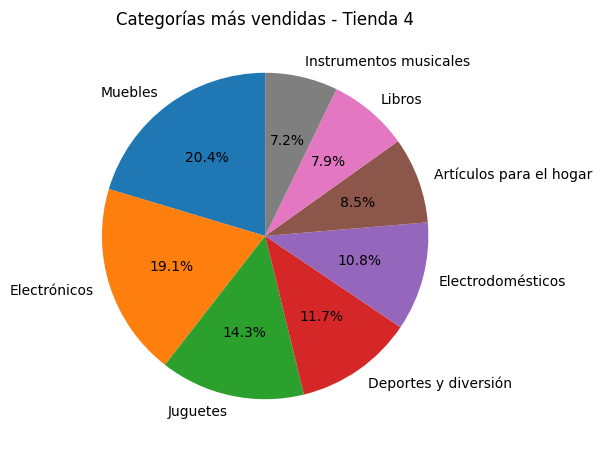

In [11]:
for nombre, categorias in ventas_por_categoria.items():
    plt.figure(figsize=(6, 6))
    categorias.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Categorías más vendidas - {nombre}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda

Mostrar calificacion promedio de cada tienda y hacer una grafica.

In [13]:
calificacion_promedio = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}
calificacion_redondeada = {tienda: round(valor, 2) for tienda, valor in calificacion_promedio.items()}

print(calificacion_redondeada)  

{'Tienda 1': np.float64(3.98), 'Tienda 2': np.float64(4.04), 'Tienda 3': np.float64(4.05), 'Tienda 4': np.float64(4.0)}


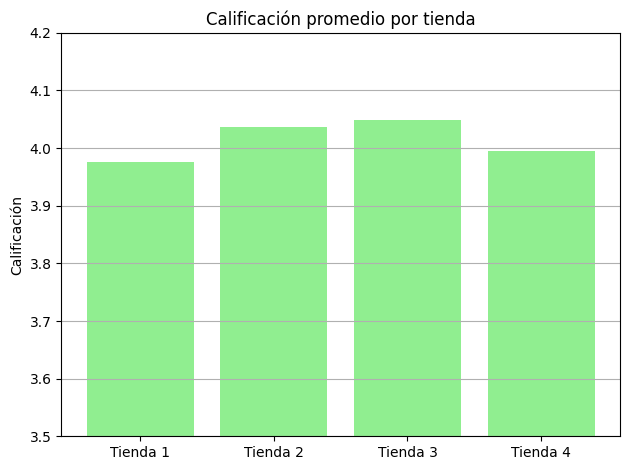

In [14]:
plt.bar(calificacion_promedio.keys(), calificacion_promedio.values(), color='lightgreen')
plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación')
plt.ylim(3.5, 4.2)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Enlistar los articulos mas vendidos y graficar.

In [15]:
productos_top5 = {
    'Tienda 1': tienda['Producto'].value_counts().head(5),
    'Tienda 2': tienda2['Producto'].value_counts().head(5),
    'Tienda 3': tienda3['Producto'].value_counts().head(5),
    'Tienda 4': tienda4['Producto'].value_counts().head(5),
}
productos_5menos = {
    'Tienda 1': tienda['Producto'].value_counts().tail(5),
    'Tienda 2': tienda2['Producto'].value_counts().tail(5),
    'Tienda 3': tienda3['Producto'].value_counts().tail(5),
    'Tienda 4': tienda4['Producto'].value_counts().tail(5),
}

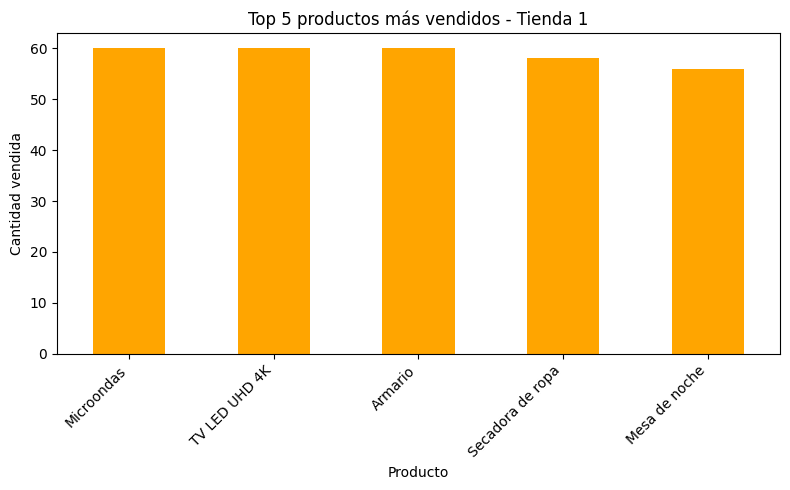

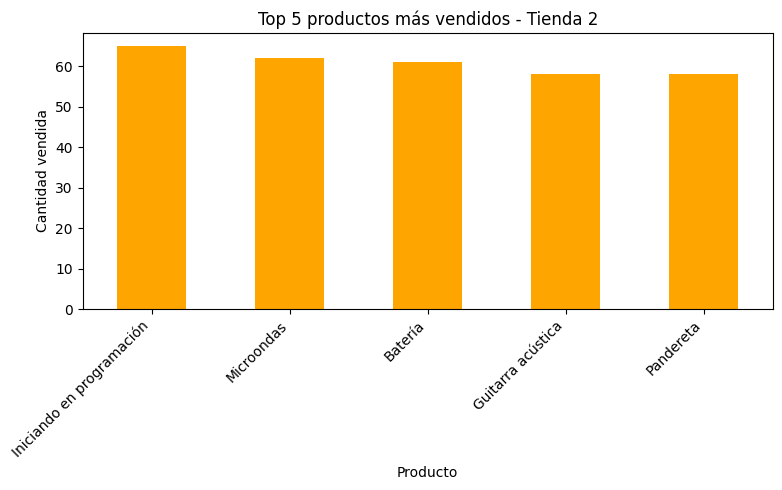

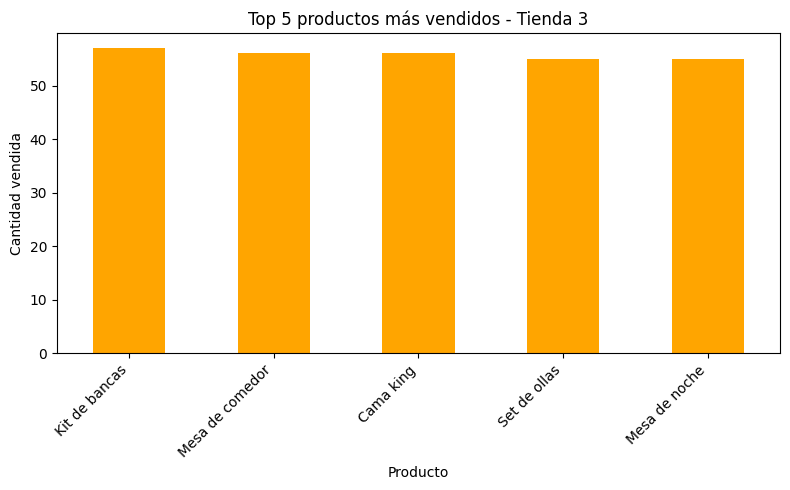

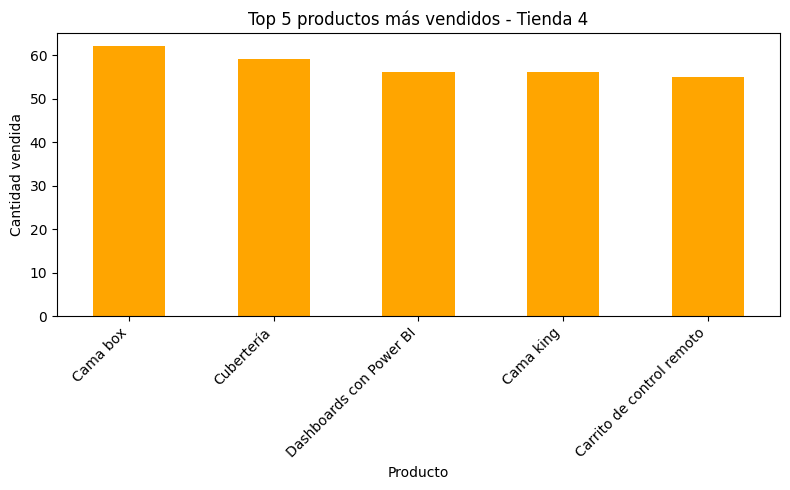

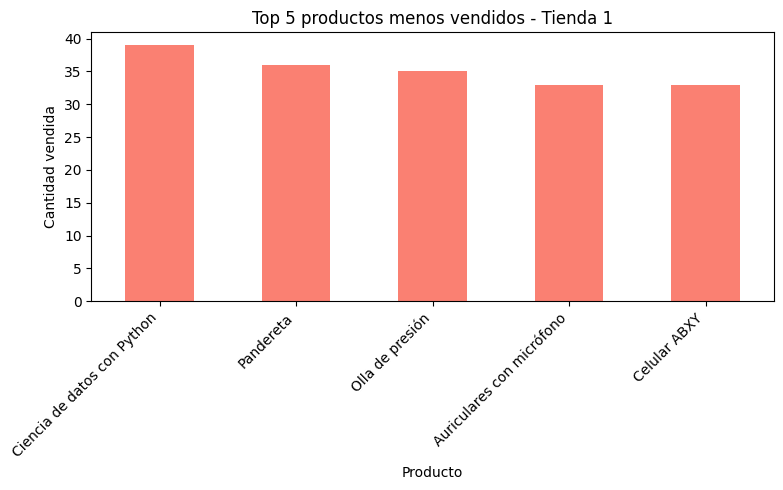

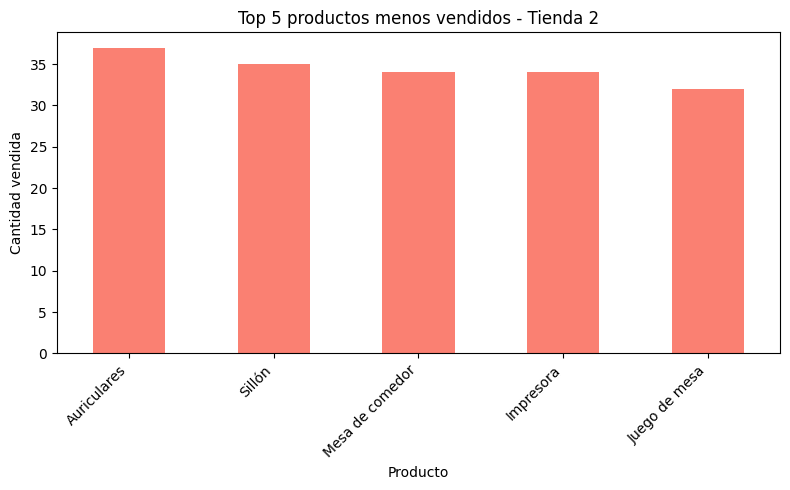

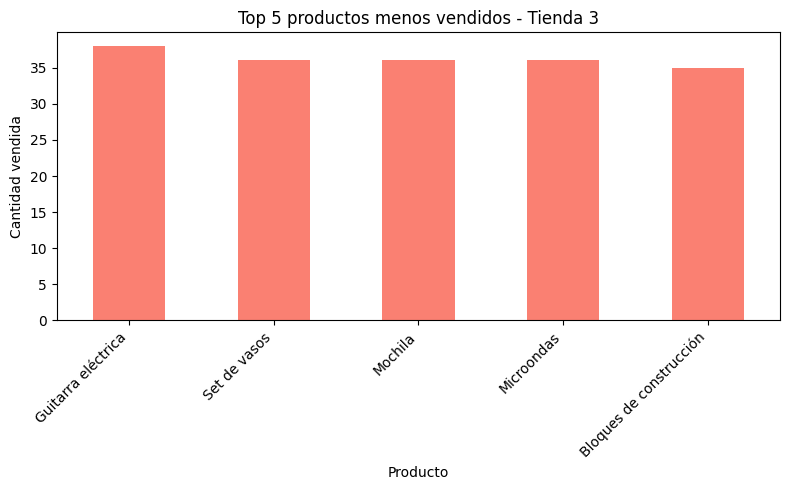

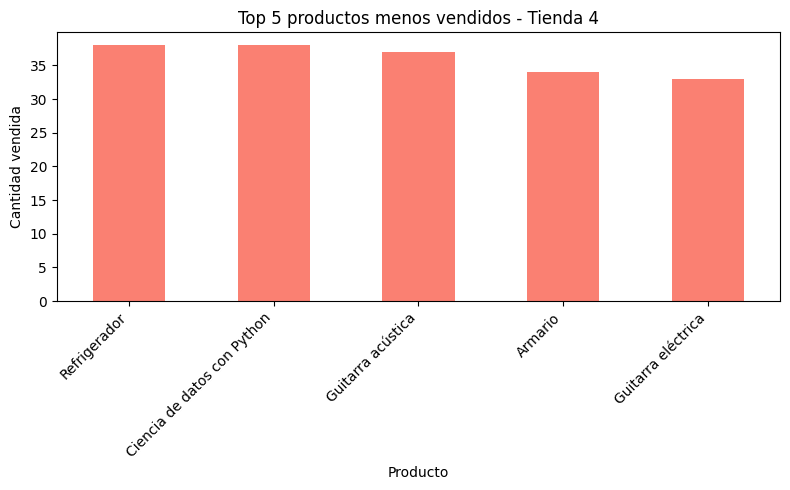

In [16]:
for tienda, top5 in productos_top5.items():
    plt.figure(figsize=(8, 5))
    top5.plot(kind='bar', color='orange')
    plt.title(f'Top 5 productos más vendidos - {tienda}')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


for tienda, bottom5 in productos_5menos.items():
    plt.figure(figsize=(8, 5))
    bottom5.plot(kind='bar', color='salmon')
    plt.title(f'Top 5 productos menos vendidos - {tienda}')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

Sumatoria del costo de envio por articulo

In [7]:
envio_promedio = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}
envio_redondeado = {tienda: round(valor, 2) for tienda, valor in envio_promedio.items()}

print(envio_redondeado)

{'Tienda 1': np.float64(26018.61), 'Tienda 2': np.float64(25216.24), 'Tienda 3': np.float64(24805.68), 'Tienda 4': np.float64(23459.46)}


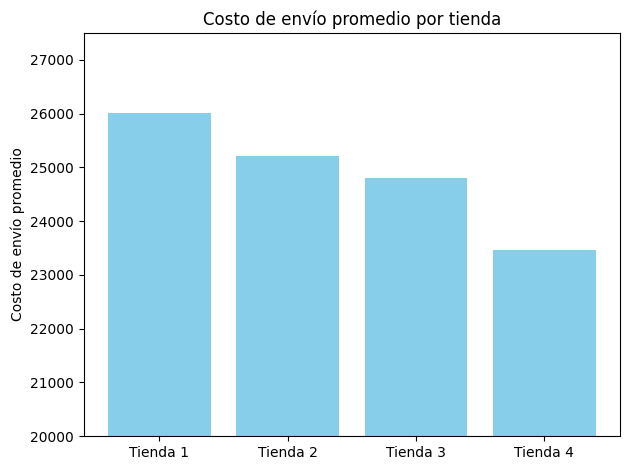

In [9]:
plt.bar(envio_promedio.keys(), envio_promedio.values(), color='skyblue')
plt.ylabel('Costo de envío promedio')
plt.title('Costo de envío promedio por tienda')
plt.ylim(20000, 27500)
plt.tight_layout()
plt.show()

## 📊 Analisis Final

Para determinar cual de las cuatro tiendas es la que se tiene que vender se detecta lo siguiente de las anteriores graficas:

1. **Ventas Totales:** La tienda 4 es la que presenta las ventas totales mas bajas y una tencencia decreciente durante los años.
2. **Ventas por categoria:** La tienda 4 cuenta con categorias que tiene menos ventas como lo son los electrodomesticos a comparacion de las demas tiendas, destaca en otras areas pero es la que menos ha recaudado de las 4 tiendas.
3. **Calificacion promedio:** La tienda 4 es una de las que tiene menor primedio en los años 2020-2022, durante el ultimo año 2023 incrementa considerablemente lo que afecta su promedio general, pero hay que considerar que los datos en 2023 solo son el primer trimestre.
4. **Costo de envio promedio:** La tienda 4 tiene el menor costo de envio, pero como se puede observar este factor no compensa el bajo rendimiento en los demas aspectos.

Debido a los puntos anteriores se da la recomendacion de **vender** la **Tienda 4**.